In [122]:
#подключение библиотеки Pandas
import pandas as pd

In [123]:
#загрузка датасета
trips = pd.read_excel("trips_data.xlsx", index_col=0) # Датафрейм

In [124]:
#вывод первых строк датасета
trips.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [125]:
#сбор общих статистических данных
trips.salary.describe()

count      1000.000000
mean     111935.000000
std       54580.049073
min           0.000000
25%       68000.000000
50%       99000.000000
75%      161000.000000
max      250000.000000
Name: salary, dtype: float64

In [126]:
#вывод количества путешественников из каждого города
trips.city.value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

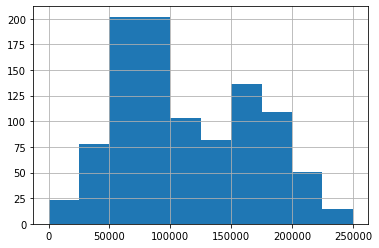

In [127]:
#построение гистограммы,информирующей о зарплатах путешественников
trips.salary.hist()

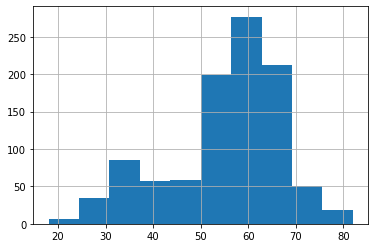

In [128]:
#построение гистограммы,информирующей о возрасте путешественников
trips.age.hist()

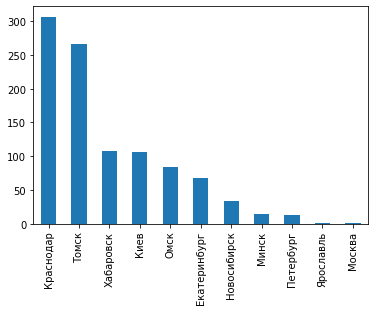

In [129]:
trips.city.value_counts().plot(kind='bar')

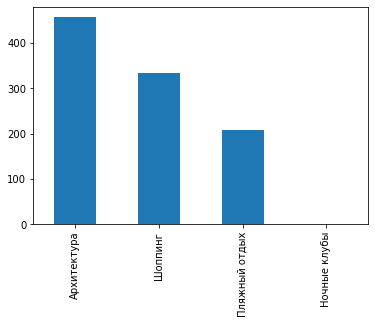

In [130]:
trips.vacation_preference.value_counts().plot(kind='bar')

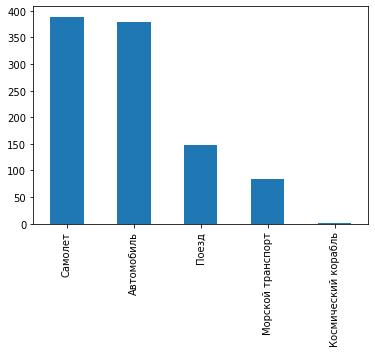

In [131]:
trips.transport_preference.value_counts().plot(kind='bar')

In [132]:
trips.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [133]:
#замена категориальных признаков
trips_transformed = pd.get_dummies(trips, columns=['city', 'vacation_preference', 'transport_preference'])

In [134]:
trips_transformed

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,81000,55,2,Paris,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
996,96000,32,1,Paris,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
997,56000,68,2,Paris,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
998,162000,69,0,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [135]:
#определение признаков и целевой переменной
input_data = trips_transformed.drop('target', axis=1) # Данные, на основе которых мы хотим научиться делать предсказание (признаки)
target = trips_transformed.target # То, что мы пытаемся предсказать (целевая переменная)

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
#создание модели Random Forest с гиперпараметрами по умолчанию
model = RandomForestClassifier() 

In [138]:
#обучение модели Random Forest
model.fit(input_data, target)

RandomForestClassifier()

In [139]:
{col:[0] for col in input_data.columns}

{'salary': [0],
 'age': [0],
 'family_members': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [140]:
example = {'salary': [200000],
 'age': [70],
 'family_members': [1],
 'city_Екатеринбург': [1],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'vacation_preference_Архитектура': [1],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [1],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0]}

In [141]:
example_dataframe = pd.DataFrame(data=example)

In [142]:
example_dataframe

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,200000,70,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [143]:
model.predict(example_dataframe)

array(['London'], dtype=object)